# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
age_spin,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
deep_texas,[Morgan Freeman] He’s in the trance. He isn’t ...,Dave Chapelle
equanimity,"“Equanimity” was shot in Washington, D.C., and...",Dave Chapelle
killin_softly,Wooo! Ya’ll gone make me lose my mind. Up in h...,Dave Chapelle
stick_stones,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle
the_bird_revelation,Recorded at the Comedy Store in Los Angeles in...,Dave Chapelle


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
age_spin,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
deep_texas,[Morgan Freeman] He’s in the trance. He isn’t ...,Dave Chapelle,0.001281,0.543389
equanimity,"“Equanimity” was shot in Washington, D.C., and...",Dave Chapelle,-0.008858,0.546709
killin_softly,Wooo! Ya’ll gone make me lose my mind. Up in h...,Dave Chapelle,-0.035023,0.574158
stick_stones,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle,-0.007704,0.521939
the_bird_revelation,Recorded at the Comedy Store in Los Angeles in...,Dave Chapelle,0.022358,0.545397


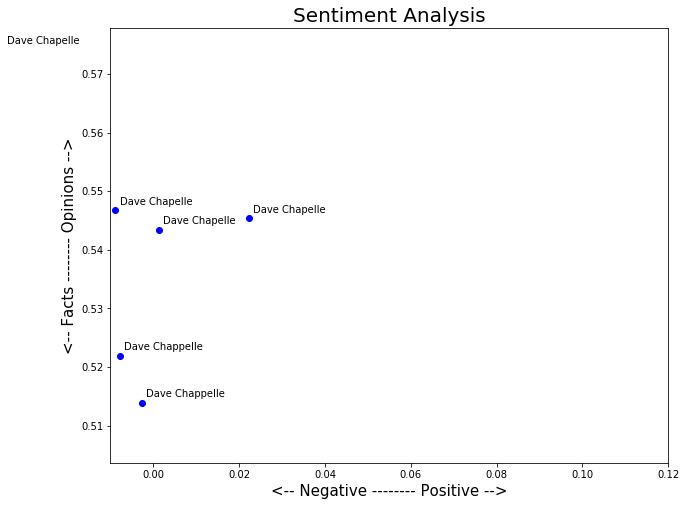

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
age_spin,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
deep_texas,[Morgan Freeman] He’s in the trance. He isn’t ...,Dave Chapelle,0.001281,0.543389
equanimity,"“Equanimity” was shot in Washington, D.C., and...",Dave Chapelle,-0.008858,0.546709
killin_softly,Wooo! Ya’ll gone make me lose my mind. Up in h...,Dave Chapelle,-0.035023,0.574158
stick_stones,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle,-0.007704,0.521939
the_bird_revelation,Recorded at the Comedy Store in Los Angeles in...,Dave Chapelle,0.022358,0.545397


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the alchemist’s fire that transforms fear and tragedy into levity and livelihood. Dave calls that look “the trance.” ♪ Play me ♪ ♪ Buy me ♪ ♪ Workinonit ♪ ♪ Tune up ♪ ♪ Tune ♪ ♪ Oh ♪ ♪ Fade me ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ ♪ In every ghetto ♪ ♪ Ah-ah, ah-ah, ah-ah ♪ Thank you! Thank you very much! Thank you all. Oh, wow. That was exciting, wasn’t it? Thank you, guys. Have a seat, feel comfortable, relax. I want to thank everyone in LA for a wonderful week. It’s been great here. You know what? It’s been ten years since the last time I played Los Angeles, if you can imagine. I know! I know, I’ve been gone for a very long time. And un

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.05093449586407334,
  -0.05557354333778966,
  0.035829891691960644,
  0.08313791054959534,
  -0.026718682968682954,
  0.09785205955660498,
  -0.12774488467261902,
  -0.0858667847304211,
  -0.06019759281122916,
  0.15191938178780284],
 [0.0715041090345968,
  0.010131899350649357,
  -0.06677166005291008,
  -0.11793260334436803,
  0.051214614633732274,
  0.13772558661145617,
  0.014931052507583125,
  0.011565863893450096,
  -0.07408886800334173,
  -0.030010822510822557],
 [0.10504629629629628,
  0.14876556776556776,
  -0.0070181405895691626,
  -0.12674933862433863,
  -0.021699160340464686,
  0.012899199956161976,
  -0.17077640396133548,
  -0.05608408023900983,
  -0.02119047619047618,
  0.07834439741805813],
 [-0.029208089716854967,
  -0.10581996302308802,
  -0.15417615932580717,
  -0.1731147769066976,
  -0.06311623258344572,
  0.08404719387755098,
  -0.02263777281746032,
  -0.02006239242685028,
  0.16269066220238093,
  0.032926961665169216],
 [0.14408516483516484,
  -0.076550587161594

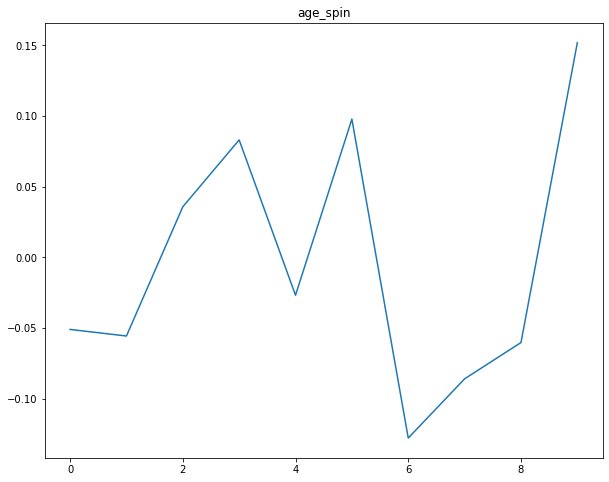

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

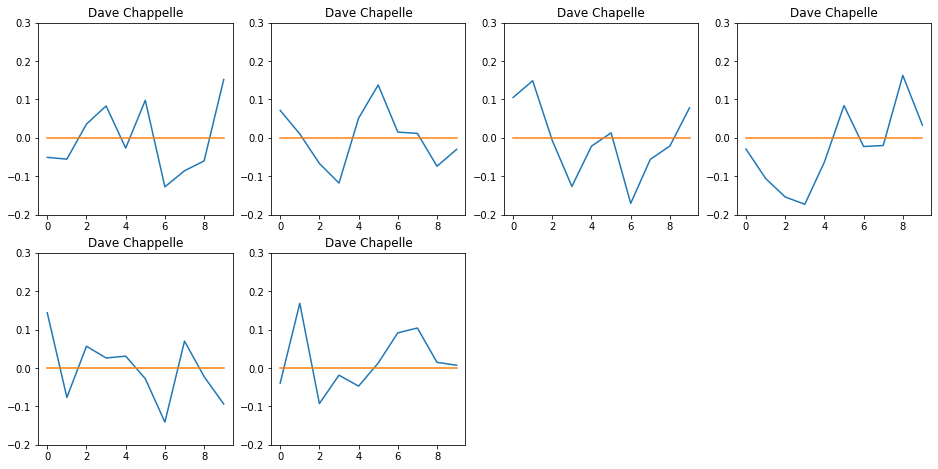

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.